In [ ]:
!pip list

In [ ]:
# one-hot encoding (Sklearn)
# 1 0 0
# 0 1 0
# 1 0 0
# 0 0 1
# 0 1 0 
# 0 0 1
from sklearn.preprocessing import OneHotEncoder
import numpy as np
data = np.array([0, 1, 0, 2, 1, 2]).reshape(-1, 1)
print(data)
ohe = OneHotEncoder()
ohe.fit_transform(data).toarray().astype('int')

In [ ]:
# 這是 Keras 用法
from keras.utils import np_utils
np_utils.to_categorical(data).astype('int')

In [1]:
import keras
keras.__version__

'2.6.0'

In [4]:
# 套件有範例數據
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train[:2].shape

(2, 28, 28)

In [20]:
X_train[:1].shape

(1, 28, 28)

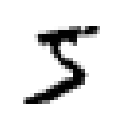

In [24]:
# 請畫出第一張圖片
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(X_train[0, :, :], cmap='gray_r')
plt.axis('off')
plt.show()

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

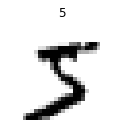

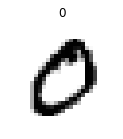

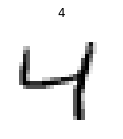

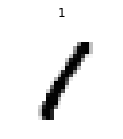

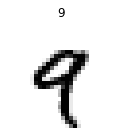

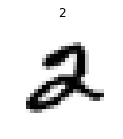

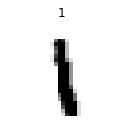

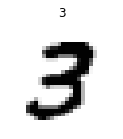

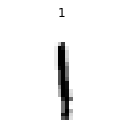

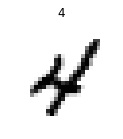

In [25]:
# 請畫出十張圖片 (前面十筆數據)

import matplotlib.pyplot as plt
for i in range(10):
    plt.figure(figsize=(2,2))
    plt.title(str(y_train[i]))
    plt.imshow(X_train[i, :, :], cmap='gray_r')
    plt.axis('off')
    plt.show()

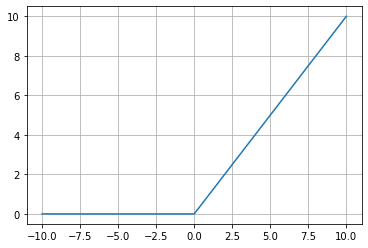

In [28]:
# 解釋 relu activation function
# max(0, x)
def myrelu(x):
    return( max(0, x))

import matplotlib.pyplot as plt
import numpy as np
X = range(-10, 11, 1)
y = [myrelu(x) for x in X]

plt.plot(X, y)
plt.grid()
plt.show()

In [36]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation #神經層
from keras.utils import np_utils           # 用來後續將 label 標籤轉為 one-hot-encoding  
import matplotlib.pyplot as plt
import os

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=256, input_dim=28*28, 
                kernel_initializer='normal', activation='relu'))             # input + hidder layer
model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))  # hidder layer
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))  # hidder layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))# Add output layer

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [ ]:

y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 


# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=800, verbose=2)  

print(model.summary())

# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  

# 預測(prediction)
X = x_Test_norm
predictions = model.predict_classes(X)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

# # 顯示錯誤的資料圖像
# X2 = X_test[8,:,:]
# plt.imshow(X2.reshape(28,28))
# plt.show() 


# 模型結構存檔
from keras.models import model_from_json
json_string = model.to_json()
with open("model.config", "w") as text_file:
    text_file.write(json_string)

print(datetime.now()-start)

    
# 模型訓練結果存檔
model.save_weights("model.weight")

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=predictions)

# draw confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()



# 取得模型組態
print("config = ", model.get_config())
# 取得模型所有權重
print("weights = ", model.get_weights())
# 取得模型彙總資訊
print("summary = ", model.summary())
# 取得網路層資訊
print("layer = ", model.get_layer(index=1).name)
# 取得參數總數
print("params = ", model.count_params())

#from keras.utils import plot_model
#plot_model(model, to_file='model.png')
